<a href="https://colab.research.google.com/github/Dinomain/Dinomain/blob/main/Employee_Attrition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Employee Attrition Analysis**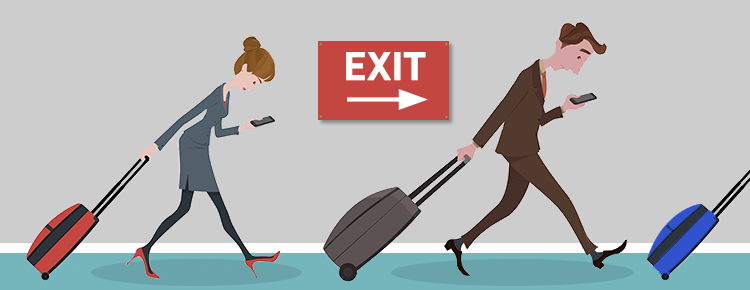

**What is Employee Attrition?**

Employee attrition occurs when the size of your workforce diminishes over time due to unavoidable factors such as employee resignation for personal or professional reasons. Employees are leaving the workforce faster than they are hired, and it is often outside the employer’s control.[source](https://https://www.spiceworks.com/hr/engagement-retention/articles/what-is-attrition-complete-guide/)

Some factors that contribute  to employee attrition include: 

*  Poor job satisfaction and pay
*  Not enough career opportunities
*  Poor work-life balance
*  Lack of employee motivation [source](https://https://www.betterup.com/blog/employee-attrition)









# **Read the database file to a Pandas DataFrame**

In [50]:
#Import the neccessary packages
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Create connection.
connect = sqlite3.connect("/content/drive/MyDrive/attr_data (1).db")

#Read data into a DataFrame

df = pd.read_sql_query("SELECT * FROM 'attrition_records'", connect)

df.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis of our Dataset

**Data Info:**

In [51]:

df.shape



(1470, 36)

In [52]:
#information about Dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [53]:
df.columns


Index(['id', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [54]:
#summary statistics of the DataSet
df.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


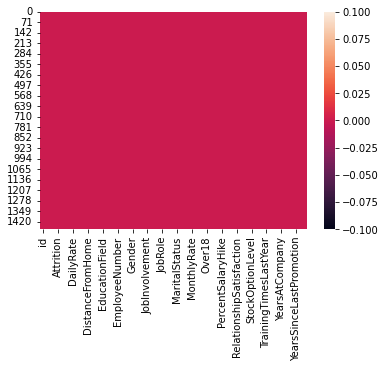

In [55]:
#Find missing values
sns.heatmap(df.isnull())

No missing values in data.

In [56]:
#Gender distribution of attrited and retained employees
display(df.groupby("Gender")["Attrition"].value_counts(normalize=True))

Gender  Attrition
Female  No           0.852041
        Yes          0.147959
Male    No           0.829932
        Yes          0.170068
Name: Attrition, dtype: float64

There is a slight difference in the attrition rate between the two genders.

In [72]:
#Separate Employees into Attrited and Retained Employees
#Attrited Employees
Att_Emp = df[df["Attrition"] == "Yes"]

Mean_Att_Emp = np.round(Att_Emp.mean(),2)

#Retained Employees

Ret_Emp = df[df["Attrition"] == "No"]

Mean_Ret_Emp = np.round(Ret_Emp.mean(),2)



#Create a DataFrame from the mean of the two DataFrames for Comparism

comp = pd.DataFrame({"attrition":list(Mean_Att_Emp), "retained":list(Mean_Ret_Emp)})

comp["features"] = ["id","Age","DailyRate","DistanceFromHome","Education","EmployeeCount","EmployeeNumber",
              "EnvironmentSatisfaction","HourlyRate ","JobInvolvement  ","JobLevel","JobSatisfaction","MonthlyIncome",
              "MonthlyRate","NumCompaniesWorked","PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StandardHours",
              "StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion",
              "YearsWithCurrManager"]

comp.set_index("features", inplace=True)

display(comp)

Ret_Emp










<ipython-input-72-1c61d16ab30a>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Mean_Att_Emp = np.round(Att_Emp.mean(),2)
<ipython-input-72-1c61d16ab30a>:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Mean_Ret_Emp = np.round(Ret_Emp.mean(),2)


,attrition,retained
features,,
id,725.46,737.43
Age,33.61,37.56
DailyRate,750.36,812.50
DistanceFromHome,10.63,8.92
Education,2.84,2.93
EmployeeCount,1.00,1.00
EmployeeNumber,1010.35,1027.66
EnvironmentSatisfaction,2.46,2.77
HourlyRate,65.57,65.95


,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
5,6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,...,3,80,0,8,2,2,7,7,3,6
6,7,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,...,1,80,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
1466,1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,1469,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8




*   Mean values of attrited employees vs retained employees. 
*   Retained employees also have a higher average monthly income compared to attrited employees. 
*   YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager are also higher on average for retained employees compared to attrited employees. 
* Retained employees have also spent over two more years on average in the company compared to attrited employees. 





In [58]:
#Divide features into numerical and categorical 

discreet = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 
            'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'StandardHours', 
            'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
            'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

categorical = ['Attrition', 'BusinessTravel','Department', 'Education', 'EducationField', 
               'EmployeeCount','EmployeeNumber','EnvironmentSatisfaction', 'Gender', 
               'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction','MaritalStatus', 
               'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 
               'StockOptionLevel','WorkLifeBalance']



**Correlation Matrix**




In [59]:
display(df.corr())

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
id,1.000000,-0.010349,-0.051484,0.032928,0.041901,NaN,0.999906,0.017424,0.034754,-0.007105,...,-0.069654,NaN,0.062452,-0.014095,0.023907,0.010740,-0.011557,-0.008853,-0.009151,-0.009432
Age,-0.010349,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,-0.051484,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,0.032928,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.041901,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,0.999906,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.017424,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.034754,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,-0.007105,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


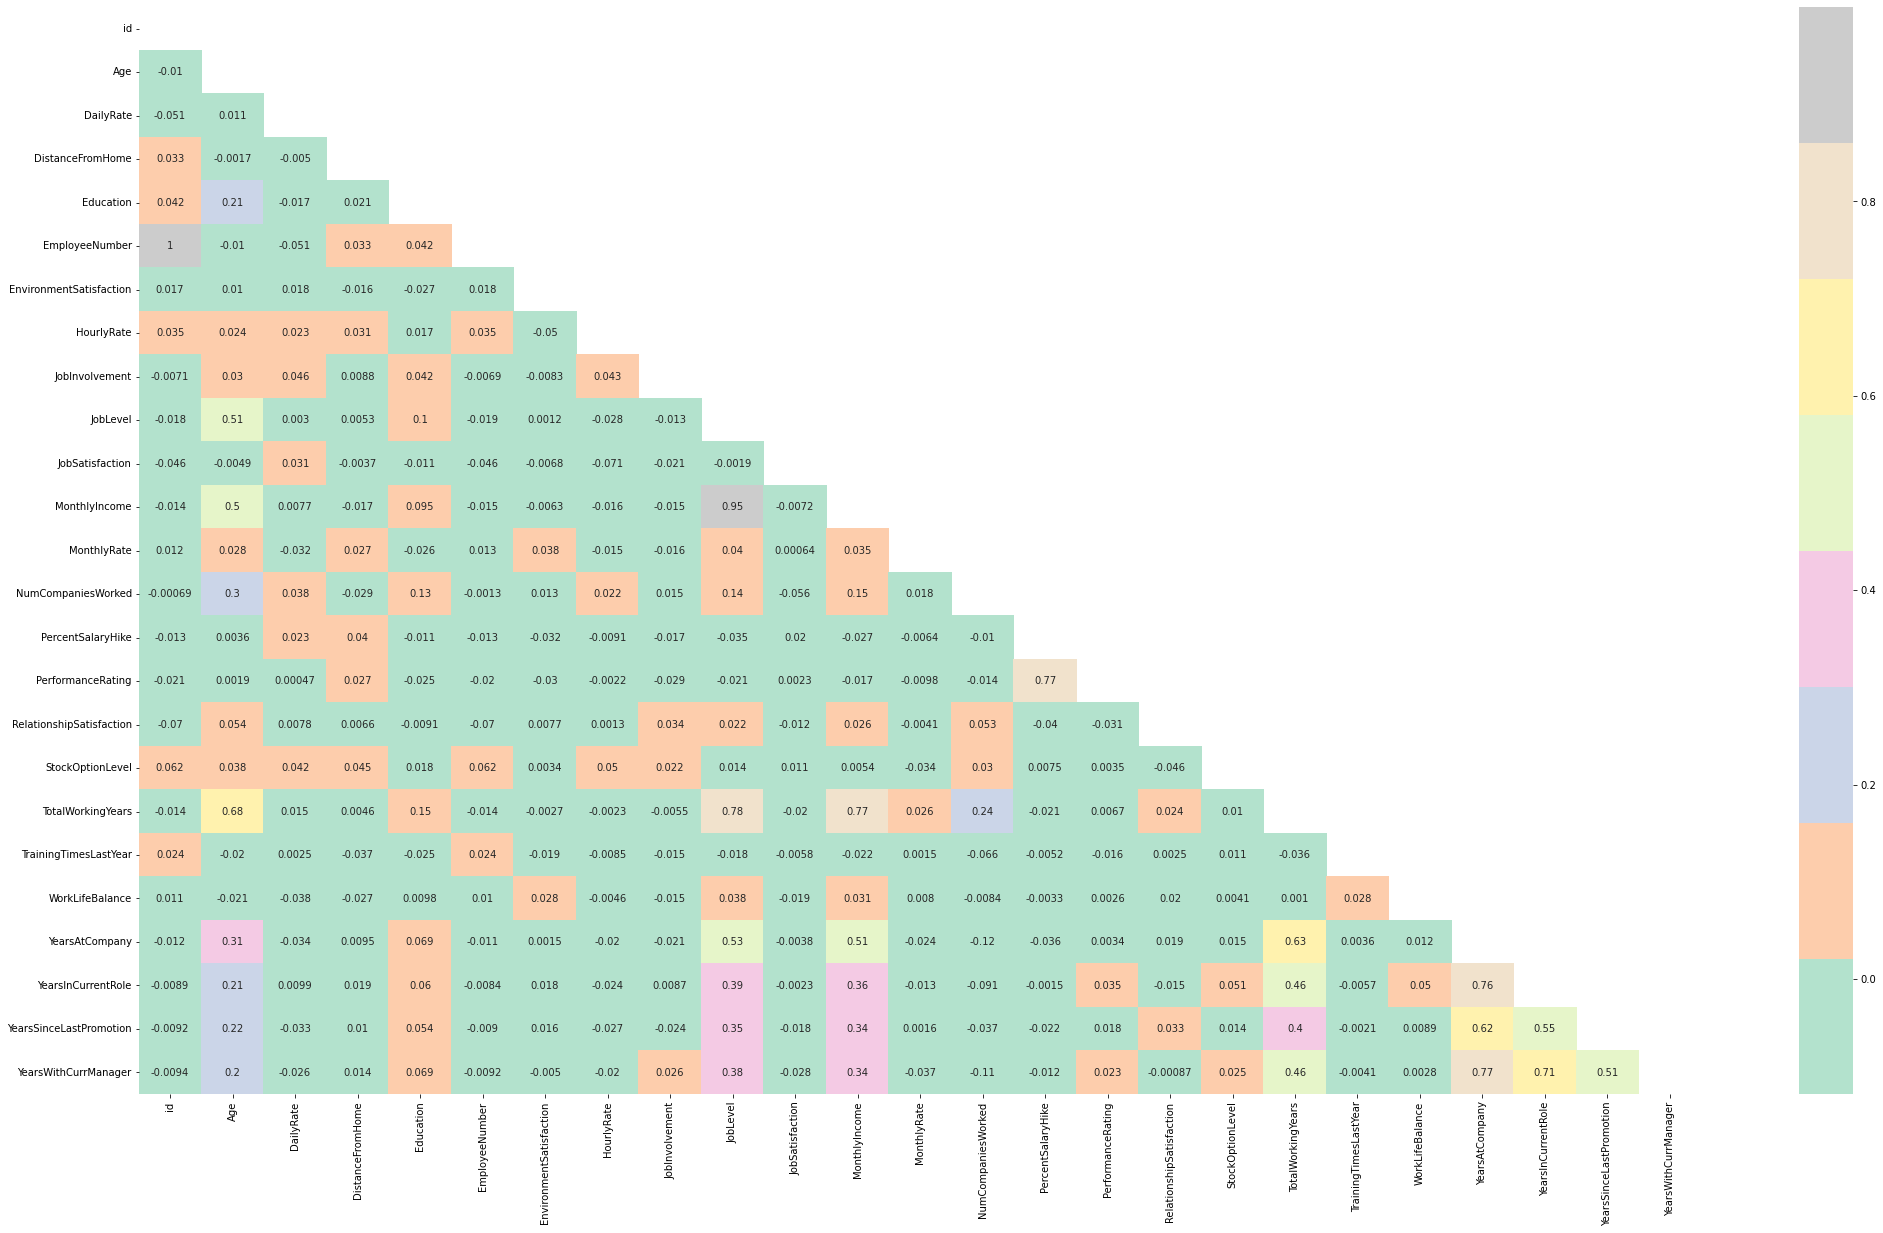

In [60]:
plt.figure(figsize=(35,20))
sns.heatmap(df.drop(["EmployeeCount","StandardHours"],axis=1).corr(),annot=True,mask=np.triu(df.drop(["EmployeeCount","StandardHours"],axis=1).corr()),cmap='Pastel2')
plt.show()

# Relationship between education and monthly income

In [61]:
rel_edu_age = df.groupby("Education")["MonthlyIncome"].mean()
rel_edu_age

Education
1    5640.570588
2    6226.645390
3    6517.263986
4    6832.402010
5    8277.645833
Name: MonthlyIncome, dtype: float64

There is an increase in the average monthly income across each education level. Let's use correlation to determine the extent of the relaionship. 

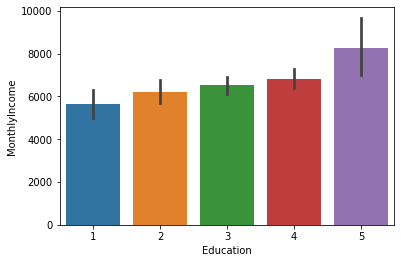

In [62]:
sns.barplot(data=df, x="Education", y="MonthlyIncome")

In [63]:
#Correlation between education and montly income
display(df["Education"].corr(df["MonthlyIncome"]))


0.09496067704188886

The output shows a postive but weak linear relationship between the two features.

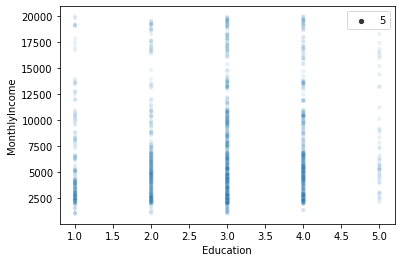

In [64]:
sns.scatterplot(data = df,x="Education", y="MonthlyIncome", size = 5, alpha=0.1)


# **Effect of Age on Attrition**

In [65]:
rel_age_Att= df.groupby("Attrition")["Age"].mean()
rel_age_Att

Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64

Retained employees have a higher average mean age than attrited employees.

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


-0.15920500686577926

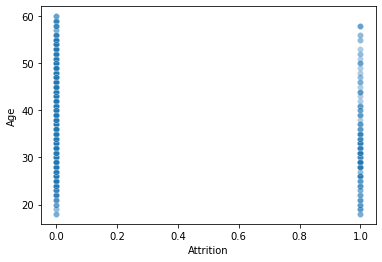

In [66]:
from numpy.ma.core import append
#Relationship between Attrition and Age
df1 = df.copy()
#Convert Attrition(nominal category) to numeric
di = {"Yes":1, "No":0}
df1["Attrition"].replace(di, inplace = True)
display(df1.head())
display(df1["Attrition"].corr(df1["Age"]))



sns.scatterplot(data = df1, x="Attrition", y="Age", alpha = 0.2)




The output above shows shows there is negative but weak linear relationship. Perhaps, this might be different across each age group. 

In [67]:
#Oldest and youngest age in the DataFrame
df["Age"].nsmallest()
df["Age"].nlargest()

#Employees in 18-20 years age range
df_20 = df[(df["Age"] >= 18) & (df["Age"] <= 20)]


#Employees in 21-30 years age range
df_30 = df[(df["Age"] > 20) & (df["Age"] <=30)]

#Employees in 31-40 years age range
df_40 = df[(df["Age"] > 30) & (df["Age"] <= 40)]

#Employees in 41-50 years age range
df_50 = df[(df["Age"] > 40 ) & (df["Age"] <= 50)]

#Employees in 51-60 age range
df_60 = df[(df["Age"] > 50) & (df["Age"] <= 60)]

len(df_30[df_30["Attrition"] == "No"])



274

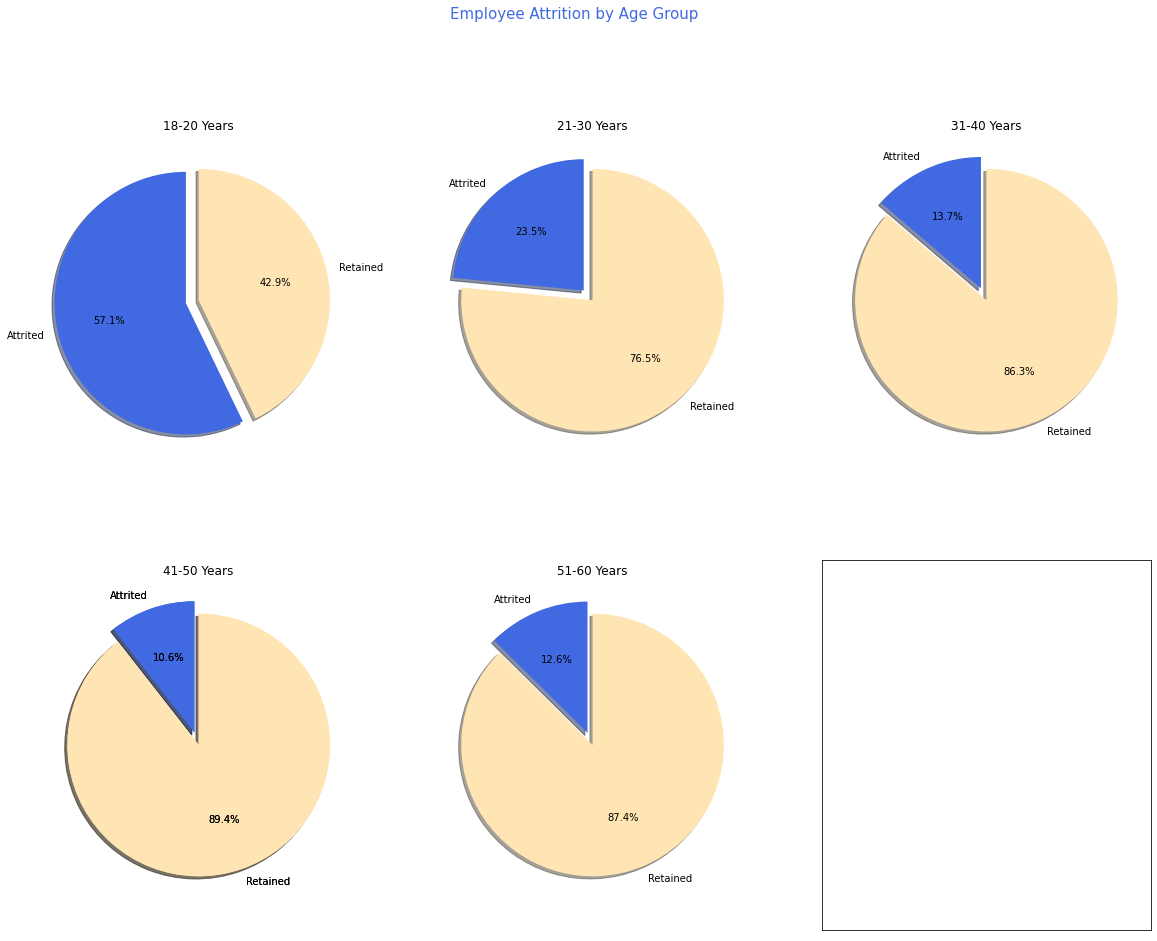

In [68]:
#Visualizing the Attrition rate accross each age group

fig, axs = plt.subplots(2,3, sharex=True, sharey=True, figsize=(20,15))
fig.suptitle('Employee Attrition by Age Group', fontsize=15, color="#4169e1")


sizes = [len(df_20[df_20["Attrition"] == "Yes"]), len(df_20[df_20["Attrition"] == "No"])]
labels = "Attrited", "Retained"
explode = (0.1, 0)
color = ["#4169e1","#FFE5B4"]

axs[0,0].pie(sizes, labels=labels, explode=explode, shadow = True, autopct='%1.1f%%', startangle=90,colors=color)
axs[0,0].set_title("18-20 Years")

sizes_2 = [len(df_30[df_30["Attrition"] == "Yes"]), len(df_30[df_30["Attrition"] == "No"])]
axs[0,1].pie(sizes_2, labels=labels, explode=explode, shadow = True, autopct='%1.1f%%', startangle=90,colors=color)
axs[0,1].set_title("21-30 Years")

sizes_3 = [len(df_40[df_40["Attrition"] == "Yes"]), len(df_40[df_40["Attrition"] == "No"])]
axs[0,2].pie(sizes_3, labels=labels, explode=explode, shadow = True, autopct='%1.1f%%', startangle=90,colors=color)
axs[0,2].set_title("31-40 Years")

sizes_4 = [len(df_50[df_50["Attrition"] == "Yes"]), len(df_50[df_50["Attrition"] == "No"])]
axs[1,0].pie(sizes_4, labels=labels, explode=explode, shadow = True, autopct='%1.1f%%', startangle=90,colors=color)
axs[1,0].set_title("41-50 Years")

sizes_4 = [len(df_50[df_50["Attrition"] == "Yes"]), len(df_50[df_50["Attrition"] == "No"])]
axs[1,0].pie(sizes_4, labels=labels, explode=explode, shadow = True, autopct='%1.1f%%', startangle=90,colors=color)
axs[1,0].set_title("41-50 Years")

sizes_5 = [len(df_60[df_60["Attrition"] == "Yes"]), len(df_60[df_60["Attrition"] == "No"])]
axs[1,1].pie(sizes_5, labels=labels, explode=explode, shadow = True, autopct='%1.1f%%', startangle=90,colors=color)
axs[1,1].set_title("51-60 Years")

plt.show()



As shown in the visualization above, older employees tend to have a lower attrition rate. 

*   Employees in the 18-20 age range have the highest attrition rate of over 57 percent. 
*   Employees in the 41-50 age range have the lowest attrition rate of about 11 percent.

Employee attrition reduces as the employee gets older but experiences a gradual increment as the employees cross the 50s threshold. This might be as a result of voluntary retirement by the employees. 





# How does work-life balance impact the overall attrition rate?



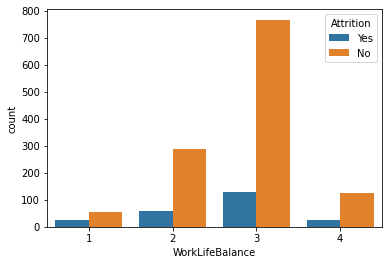

In [69]:

wor_rate = df.groupby("WorkLifeBalance")["Attrition"].value_counts()
wor_rate = df.groupby("WorkLifeBalance")["Attrition"].value_counts().values
#WorkLife Balance of Attrited Employees
ax = sns.countplot(data = df, x="WorkLifeBalance", hue="Attrition")

This countplot above does not give us enough information. Perhaps, further visualization of attrition rate by the work-life balance category would give us more insights. 

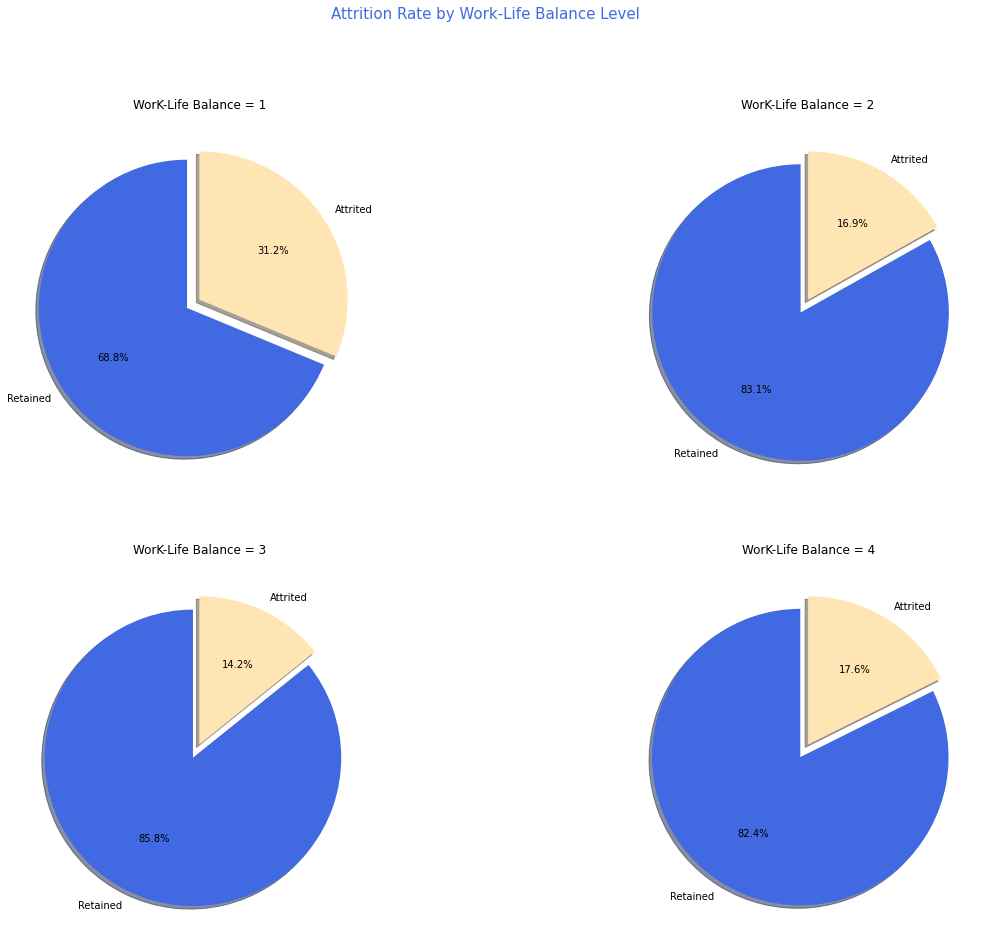

WorkLifeBalance  Attrition
1                No            55
                 Yes           25
2                No           286
                 Yes           58
3                No           766
                 Yes          127
4                No           126
                 Yes           27
Name: Attrition, dtype: int64


In [70]:
#Visualizing the attrition rate across each WorkLifeBalance Category

fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize=(20,15))
fig.suptitle('Attrition Rate by Work-Life Balance Level', fontsize=15, color="#4169e1")

size = list(wor_rate)
labels = "Retained", "Attrited"
explode = (0.1, 0)
color = ["#4169e1","#FFE5B4"]
sizes = [size[0], size[1]]
axs[0,0].pie(sizes, labels=labels, explode=explode, shadow = True, autopct='%1.1f%%', startangle=90,colors=color)
axs[0,0].set_title("WorK-Life Balance = 1")

sizes_2 = [size[2], size[3]]
axs[0,1].pie(sizes_2, labels=labels, explode=explode, shadow = True, autopct='%1.1f%%', startangle=90,colors=color)
axs[0,1].set_title("WorK-Life Balance = 2")

sizes_3 = [size[4], size[5]]
axs[1,0].pie(sizes_3, labels=labels, explode=explode, shadow = True, autopct='%1.1f%%', startangle=90,colors=color)
axs[1,0].set_title("WorK-Life Balance = 3")

sizes_4 = [size[-2], size[-1]]
axs[1,1].pie(sizes_4, labels=labels, explode=explode, shadow = True, autopct='%1.1f%%', startangle=90,colors=color)
axs[1,1].set_title("WorK-Life Balance = 4")

plt.show()

list(wor_rate)

print(df.groupby("WorkLifeBalance")["Attrition"].value_counts())

1.   Employees with the lowest work-life balance have a massive attrition rate of 31.2%. 
2.   Employees who have the level three work-life balance have the lowest attrition rate. 
1.   This goes to show that work-life balance is one of the major factors responsible for employee attrition. 




